In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Loading the dataset
data = pd.read_csv('C:/Users/shaje/OneDrive/Documents/NCL Internship/8_2023_113.csv')

In [3]:
data.head()

,bulk_id,car_reg_no,vehicle_speed,heading,distance,altitude,o_s1_b1_voltage,o_s2_b2_voltage,o_s1_current,calculated_engine_load,...,egr_error,absolute_barometric_pressure,engine_coolant_temperature,intake_air_temperature,catalyst_temperature_b1_s1,catalyst_temperature_b1_s2,ambient_air_temperature,time_stamp,latitude,longitude
0,7751886,113,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2023-08-31 21:26:22,0.0,0.0
1,7751885,113,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2023-08-31 21:26:20,0.0,0.0
2,7751884,113,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2023-08-31 21:26:17,0.0,0.0
3,7751883,113,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2023-08-31 21:26:15,0.0,0.0
4,7751882,113,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2023-08-31 21:26:13,0.0,0.0


In [4]:
data.shape

(80168, 41)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80168 entries, 0 to 80167
Data columns (total 41 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   bulk_id                               80168 non-null  int64  
 1   car_reg_no                            80168 non-null  int64  
 2   vehicle_speed                         80168 non-null  float64
 3   heading                               80168 non-null  float64
 4   distance                              0 non-null      float64
 5   altitude                              80168 non-null  float64
 6   o_s1_b1_voltage                       0 non-null      float64
 7   o_s2_b2_voltage                       77333 non-null  float64
 8   o_s1_current                          77317 non-null  float64
 9   calculated_engine_load                77305 non-null  float64
 10  engine_rpm                            77288 non-null  float64
 11  spark_advance  

In [6]:
data.isnull().sum()

bulk_id                                     0
car_reg_no                                  0
vehicle_speed                               0
heading                                     0
distance                                80168
altitude                                    0
o_s1_b1_voltage                         80168
o_s2_b2_voltage                          2835
o_s1_current                             2851
calculated_engine_load                   2863
engine_rpm                               2880
spark_advance                            2894
absolute_load_value                      2913
throttle_position                        2921
relative_throttle_position               2927
absolute_throttle_position               2931
ap_pos_d                                 2957
ap_pos_e                                 2975
commanded_exhaust_gas_recirculation     80168
commanded_evaporative_purge              2984
commanded_throttle_actuator             80168
fuel_rail_pressure                

In [7]:
# Drop irrelevant columns and handle missing values
data.drop(columns=['bulk_id', 'car_reg_no', 'latitude', 'longitude'], inplace=True)

In [8]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
       vehicle_speed       heading  distance      altitude  o_s1_b1_voltage  \
count   80168.000000  80168.000000       0.0  80168.000000              0.0   
mean       31.934700     99.546440       NaN     -3.722738              NaN   
std        25.092601    118.111806       NaN      9.607077              NaN   
min         0.000000      0.000000       NaN    -44.200000              NaN   
25%        10.000000      0.000000       NaN     -9.200000              NaN   
50%        29.000000     45.967628       NaN      0.000000              NaN   
75%        49.000000    217.057953       NaN      0.000000              NaN   
max        99.000000    359.957153       NaN     48.700000              NaN   

       o_s2_b2_voltage  o_s1_current  calculated_engine_load    engine_rpm  \
count     77333.000000       77317.0            77305.000000  77288.000000   
mean          0.472435           0.0               63.217888   1298.724847   
std           0.346749           

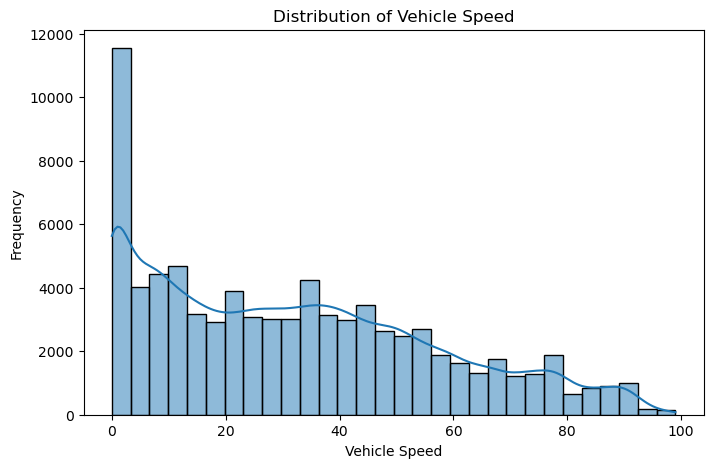

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of the target variable (vehicle_speed)
plt.figure(figsize=(8, 5))
sns.histplot(data['vehicle_speed'], kde=True, bins=30)
plt.title('Distribution of Vehicle Speed')
plt.xlabel('Vehicle Speed')
plt.ylabel('Frequency')
plt.show()

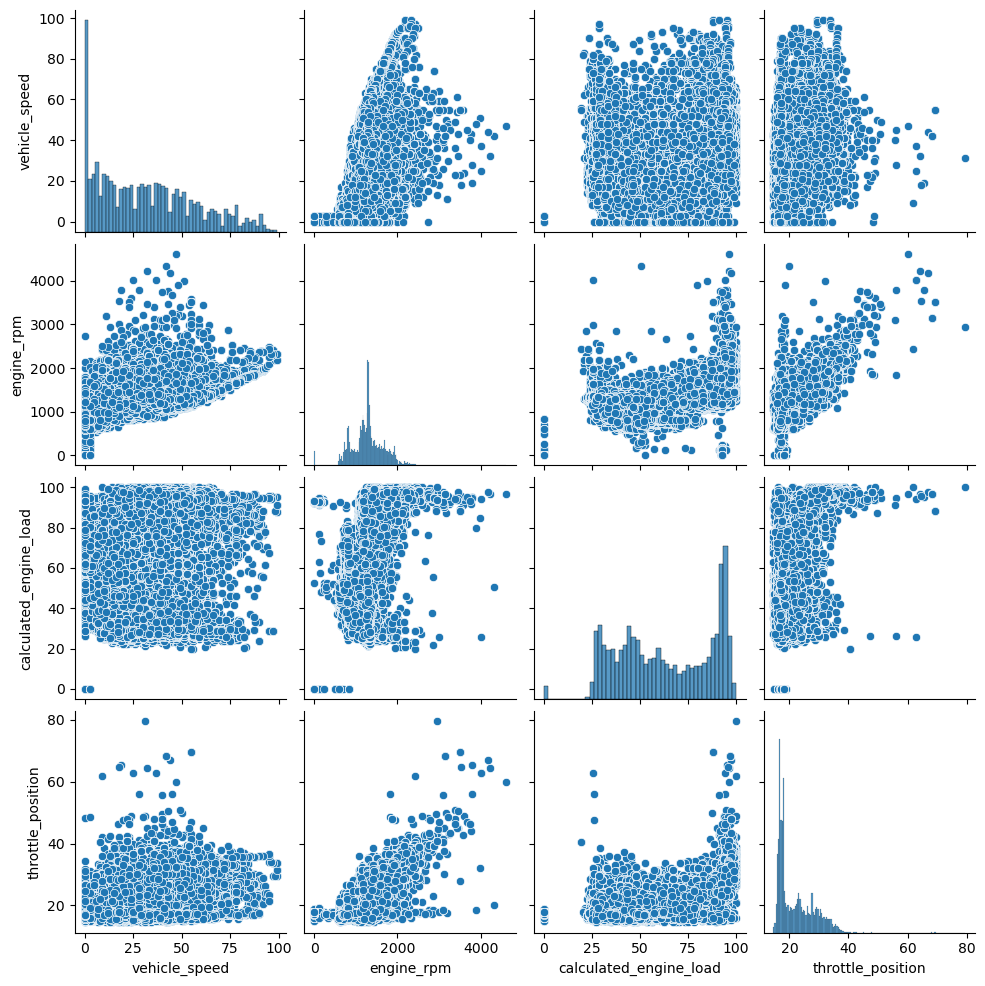

In [10]:
# Pairplot of selected features and target
selected_features = ['vehicle_speed', 'engine_rpm', 'calculated_engine_load', 'throttle_position']
sns.pairplot(data[selected_features])
plt.show()

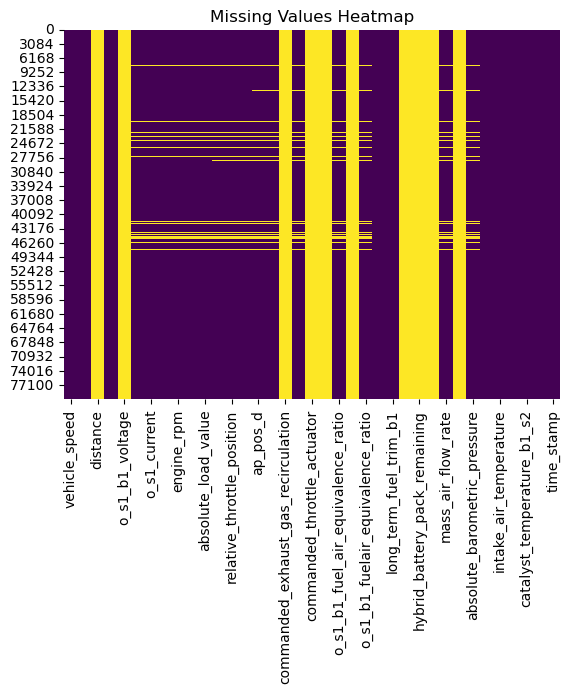

In [11]:
# Missing values heatmap
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [16]:
# Drop irrelevant or fully null columns
columns_to_drop = [
    'distance', 'o_s1_b1_voltage', 'commanded_exhaust_gas_recirculation', 
    'commanded_throttle_actuator', 'fuel_rail_pressure', 'fuel_tank_level_input',
    'fuel_air_commanded_equivalence_ratio', 'hybrid_battery_pack_remaining',
    'intake_manifold_absolute_pressure', 'egr_error', 'catalyst_temperature_b1_s1',
    'catalyst_temperature_b1_s2', 'time_stamp'
]
data_cleaned = data.drop(columns=columns_to_drop, axis=1)

In [17]:
# Impute missing values with column means
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
numerical_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
data_cleaned[numerical_columns] = imputer.fit_transform(data_cleaned[numerical_columns])

In [18]:
# Confirm data cleaning
print(data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80168 entries, 0 to 80167
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   vehicle_speed                       80168 non-null  float64
 1   heading                             80168 non-null  float64
 2   altitude                            80168 non-null  float64
 3   o_s2_b2_voltage                     80168 non-null  float64
 4   o_s1_current                        80168 non-null  float64
 5   calculated_engine_load              80168 non-null  float64
 6   engine_rpm                          80168 non-null  float64
 7   spark_advance                       80168 non-null  float64
 8   absolute_load_value                 80168 non-null  float64
 9   throttle_position                   80168 non-null  float64
 10  relative_throttle_position          80168 non-null  float64
 11  absolute_throttle_position          80168

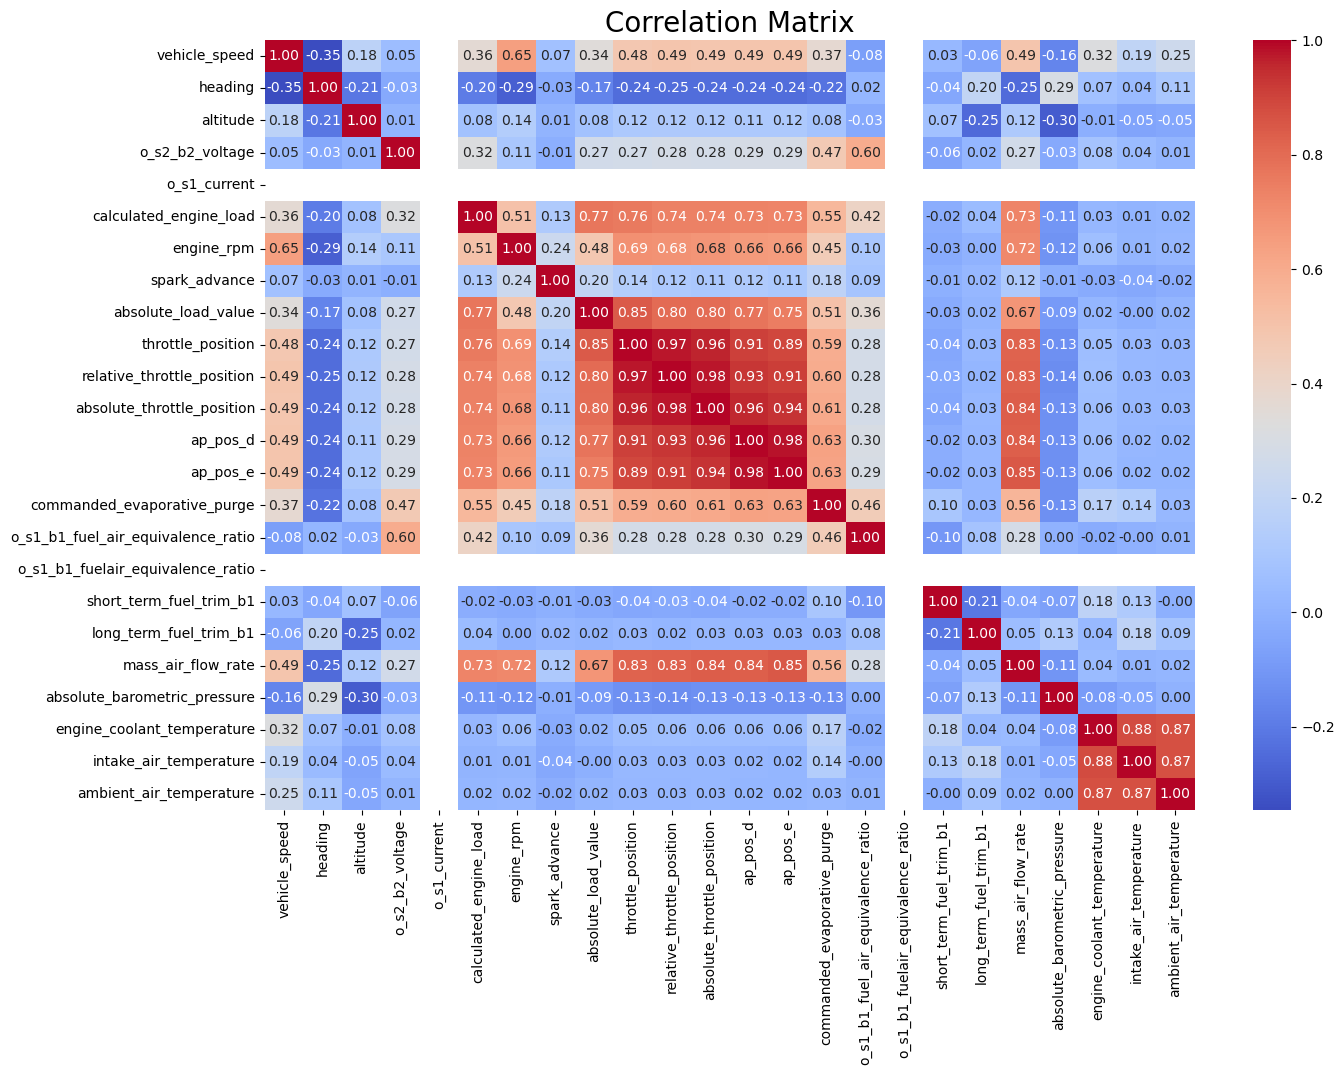

In [19]:
# EDA: Correlation Matrix
correlation_matrix = data_cleaned.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix', fontsize=20)
plt.show()

In [20]:
# Define target and features
target_variable = 'vehicle_speed'
X = data_cleaned.drop(columns=[target_variable])
y = data_cleaned[target_variable]

In [21]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
# Standard Scaling of features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
# Train a Random Forest Regressor model
model = RandomForestRegressor(random_state=0, n_estimators=100)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=0)

In [24]:
# Predictions and evaluation
y_pred = model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)